In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape




(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]
single_image.shape

(28, 28)

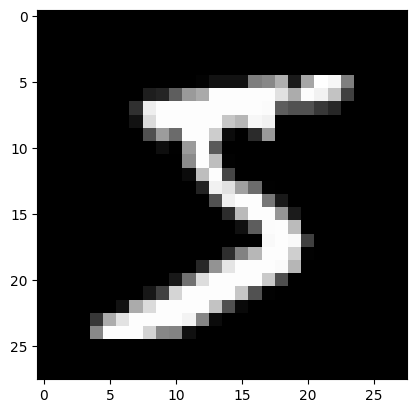

In [6]:
plt.imshow(single_image,cmap='gray')
y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

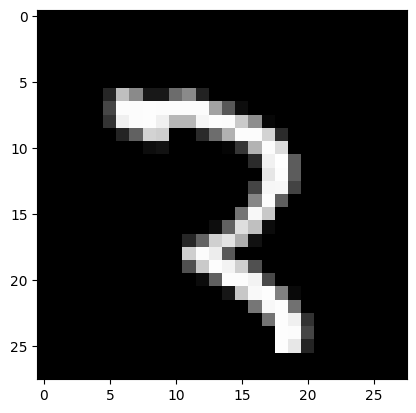

In [7]:
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [19]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [21]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 22s 23ms/step - loss: 0.2556 - accuracy: 0.9269 - val_loss: 0.0935 - val_accuracy: 0.9721
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0790 - accuracy: 0.9772 - val_loss: 0.0633 - val_accuracy: 0.9808
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0553 - accuracy: 0.9836 - val_loss: 0.0556 - val_accuracy: 0.9815
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0580 - val_accuracy: 0.9817
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0529 - val_accuracy: 0.9828


In [22]:
metrics = pd.DataFrame(model.history.history)
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.255617,0.926917,0.093515,0.9721
1,0.079012,0.977150,0.063278,0.9808
2,0.055345,0.983633,0.055625,0.9815
3,0.042947,0.987233,0.057971,0.9817
4,0.034754,0.989300,0.052930,0.9828


<Axes: >

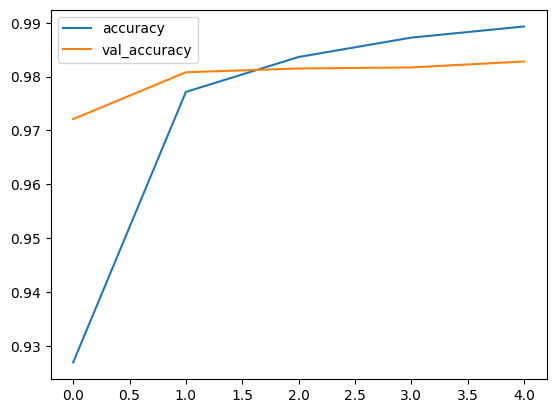

In [23]:
metrics[['accuracy','val_accuracy']].plot()


313/313 [==============================] - 1s 3ms/step


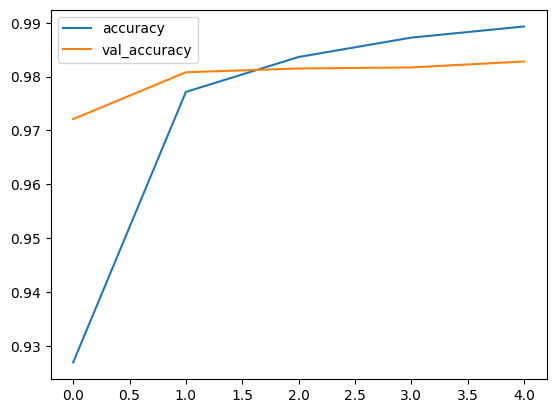

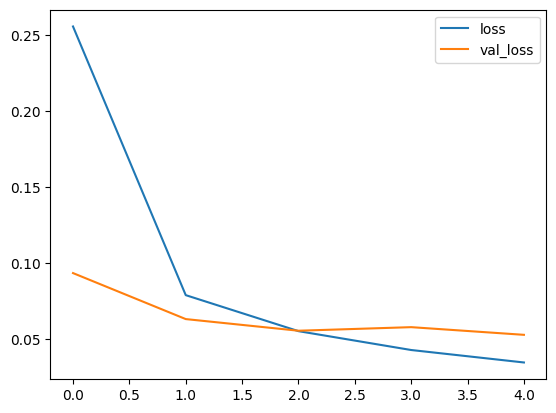

In [26]:
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)



In [27]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 972    0    3    1    0    0    1    1    2    0]
 [   0 1125    6    1    1    0    1    1    0    0]
 [   1    0 1026    1    0    0    0    4    0    0]
 [   0    0    1 1005    0    0    0    2    2    0]
 [   0    1    7    0  970    0    0    1    0    3]
 [   2    0    2   18    0  862    4    1    1    2]
 [   8    2    3    0    2    2  936    0    5    0]
 [   0    2   11    1    0    0    0 1012    1    1]
 [   4    0    8    8    1    2    0    3  945    3]
 [   2    1    0    6    6    2    0   15    2  975]]


In [28]:
print(classification_report(y_test,x_test_predictions))



              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [59]:
img = image.load_img('oo.jpg')

1/1 [==============================] - 0s 22ms/step
[2]
1/1 [==============================] - 0s 22ms/step


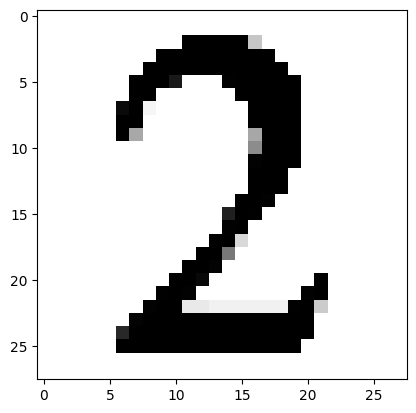

In [60]:
type(img)
img = image.load_img('oo.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


In [61]:
print(x_single_prediction)

[2]
